# Pandas

This notebook covers a _lot_, go through it carefully and _read_ the code. Then work on _understanding_ it. Then apply it to your data set. Then once you've done that, you'll probably _actually_ understand it.

Messing about with the [NSW Penalty data](http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv)

In [1]:
pip install RISE

  Using cached rise-5.6.1-py2.py3-none-any.whl (4.0 MB)
Note: you may need to restart the kernel to use updated packages.


`imports`, you've seen this before!

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import math
from numpy import cos, sin, arcsin, sqrt
from math import radians
import numpy as np
import pandas as pd
import RISE
import os

Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [5]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [6]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

Let's check to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.


In [7]:
if os.path.isfile("listings_data.csv"):
    filepath = "listings_data.csv"
    print("loading from file")
else:
    filepath = "http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv"
    print("loading from the internet")

listdata = pd.read_csv(filepath)
print("done")

loading from file
done


In [8]:
listdata.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11156,An Oasis in the City,40855,Colleen,NaN,Sydney,-33.86917,151.22656,Private room,64,2,196,2020-03-13,1.53,1,364
1,12351,Sydney City & Harbour at the door,17061,Stuart,NaN,Sydney,-33.86515,151.19190,Private room,14314,2,526,2019-09-22,4.37,2,0
2,14250,Manly Harbour House,55948,Heidi,NaN,Manly,-33.80093,151.26172,Entire home/apt,471,5,2,2019-01-02,0.04,2,173
3,44545,Sunny Darlinghurst Warehouse Apartment,112237,Atari,NaN,Sydney,-33.87888,151.21439,Entire home/apt,130,3,76,2020-01-03,0.65,1,0
4,58506,"Studio Yindi @ Mosman, Sydney",279955,John,NaN,Mosman,-33.81927,151.23652,Entire home/apt,140,2,280,2020-04-23,2.43,1,267
5,61721,"2br Eclectic Stylish Home, 2 mins to Bondi Beach",299170,Eilish,NaN,Waverley,-33.88890,151.27726,Entire home/apt,245,4,32,2020-04-01,0.29,3,364
6,65126,Large Garden Apartment in Bondi.,318390,Nicolette,NaN,Waverley,-33.88569,151.26886,Entire home/apt,170,4,13,2020-01-12,0.12,1,0
7,66009,Comfort & space in the heart of Paddington,322887,Belinda,NaN,Woollahra,-33.88327,151.22725,Private room,100,3,1,2014-02-28,0.01,1,0
8,66158,LONGER TERM TENANT wanted for furnished studio,323771,Maxine,NaN,Sydney,-33.87248,151.22814,Entire home/apt,80,30,15,2017-04-30,0.13,1,365
9,66170,Gorgeous arty warehouse apartment,16474,Anand,NaN,Sydney,-33.88333,151.19524,Entire home/apt,190,3,2,2020-04-04,0.57,1,303


`dataframe.head()` gives the top 5 rows, if it was `dataframe.head(3)` it would give the top 3 rows. 

We can also get the list of columns out of the data frame

In [9]:
listdata.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

This is useful for you when you are documenting your dataset, you can make each column a heading, and then describe that column's characteristics.

You can't index a row directly, you need to use the iloc property.

This gives us the row as a _Series_.

↓

In [10]:
row_one = listdata.iloc[33069]
row_one

id                                                            40704440
name                              Lakeside gem on the Northern Beaches
host_id                                                      232911709
host_name                                                        David
neighbourhood_group                                                NaN
neighbourhood                                                Warringah
latitude                                                      -33.7197
longitude                                                      151.296
room_type                                              Entire home/apt
price                                                              174
minimum_nights                                                       3
number_of_reviews                                                    1
last_review                                                 2020-01-02
reviews_per_month                                                 0.19
calcul

Series objects are _very_ similar to dictionaries. They have more properties though.

In [11]:
print (listdata)

id                                             name    host_id  \
0         11156                             An Oasis in the City      40855   
1         12351                Sydney City & Harbour at the door      17061   
2         14250                              Manly Harbour House      55948   
3         44545           Sunny Darlinghurst Warehouse Apartment     112237   
4         58506                    Studio Yindi @ Mosman, Sydney     279955   
...         ...                                              ...        ...   
36896  43731510  Luxury with Stunning Views & 5 Minutes to Beach    7233990   
36897  43731718                        Hear the waves at Newport  173263432   
36898  43731809                   Contemporary Camperdown Studio   75831939   
36899  43733286                                 Ultimo 黄金位置的优质公寓  349249074   
36900  43736755        2 storey apartment in the CBD a big space   59394210   

      host_name  neighbourhood_group neighbourhood  latitude  lo

Doing the same thing on a dataframe gives us the whole column

In [67]:
def haversine(row):
    lon1 = 151.2070
    lat1 = -33.8832
    lon2 = row['longitude']
    lat2 = row['latitude']
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a)) 
    km = 6367 * c
    return km

listdata['distance'] = listdata.apply(lambda row: haversine(row), axis=1)
ab = listdata.sort_values(by=["reviews_per_month"], ascending=True)
ab['number_of_reviews'] = pd.to_numberic(ab['number_of_reviews'].astpe(str).str[:-1], errors = 'coerce') 
ab
    


AttributeError: module 'pandas' has no attribute 'to_numberic'

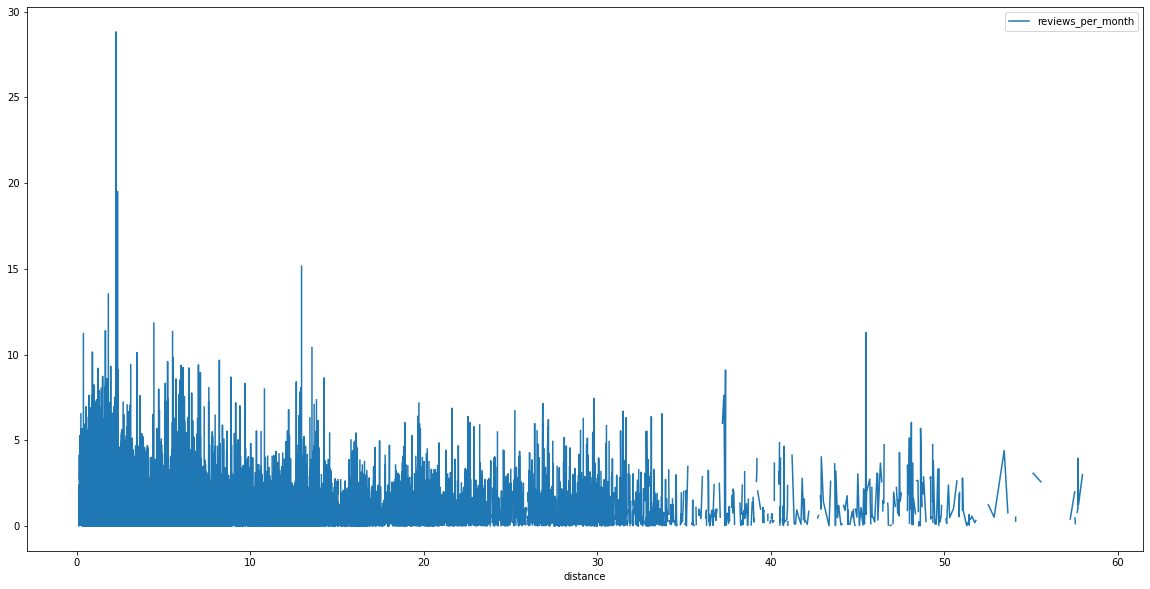

In [64]:
ax = ab.plot(x ="distance", y = "reviews_per_month", rot = 0)


If we do a simple `plot` on this column we get a pretty dense, but useless graph. It much better one would be a histogram.

Text(0.5, 1.0, 'Amount of AirBNBs from Central Station')

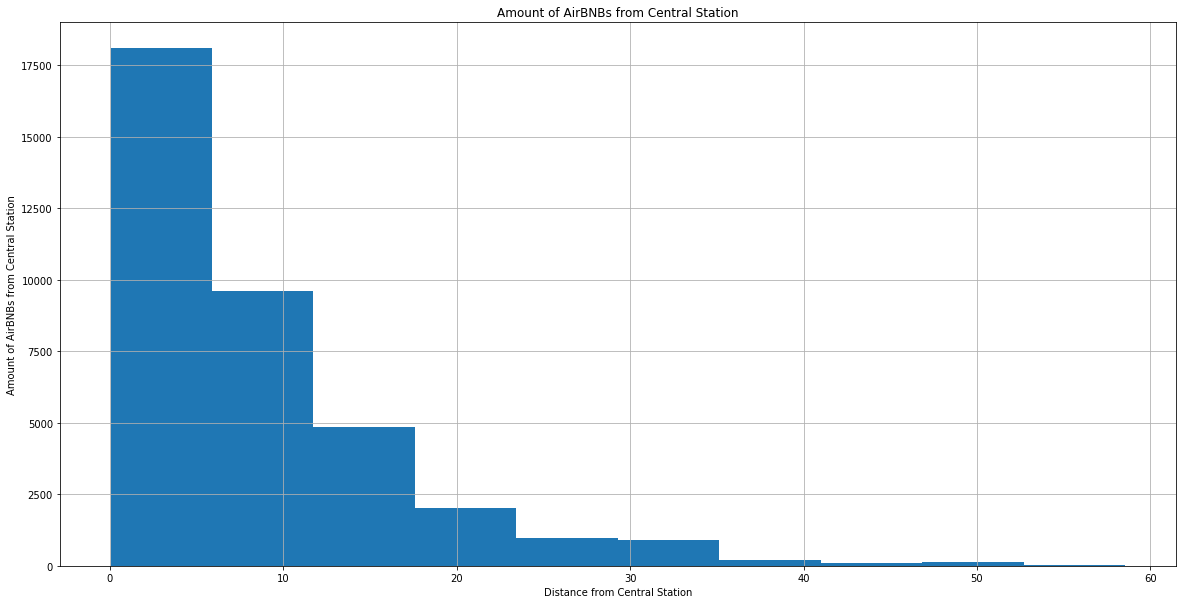

In [62]:
ad = ab["distance"].hist()
ad.set_xlabel("Distance from Central Station")
ad.set_ylabel("Amount of AirBNBs from Central Station")
ad.set_title("Amount of AirBNBs from Central Station")


The problem we have now is that almost _all_ fines are less than $2000, but there's a very long tail that fills up the right of the graph.

Let's exclude all the values above $3000, and see what it looks like.

We can do that with a nice feature of pandas, boolean indexing:

In [15]:
cpudata["APR"][cpudata["APR"] > 0.00].hist()

NameError: name 'cpudata' is not defined

That's pretty crazy/powerful, so let's see that happen a bit more clearly.

We'll make our own series and call it  `some_numbers`

Let's give it the values 0-99 

In [16]:
# Note the capital S, I have no idea why they did that!
# but if you get an `AttributeError: 'module' object has no attribute 'series'` error...
#                 v
some_numbers = pd.Series(range(1))
some_numbers.head()

0    0
dtype: int64

We can use boolean indexing to get just the values that are less than 8

In [17]:
some_numbers[some_numbers < 8]

0    0
dtype: int64

Or we can be fancy and get the numbers that are less than 4 _or_ more than 97:

In [18]:
some_numbers[(some_numbers < 4) | (some_numbers > 97)] #this needs the round brackets,
                                                       # not really sure why.

0    0
dtype: int64

We can be _really fancy_ too!

This needs to resolve to a list of booleans that matches the list of inputs. It's filtering only for values that are True.

If we use a list comprehension then we can do almost anything we like!

In [19]:
pets = ["Dog", "Goat", "pig", "Sheep", "Cattle", "Zebu", "Cat", "Chicken", "Guinea pig",         "Donkey", "duck", "Water buffalo", "Western honey bee", "dromedary camel", "Horse", 
        "silkmoth", "pigeon", "goose", "Yak", "Bactrian camel", "Llama", "Alpaca", "guineafowl",         "Ferret", "muscovy duck", "Barbary dove", "Bali cattle", "Gayal", "turkey", "Goldfish", 
        "rabbit", "Koi", "canary", "Society finch", "Fancy mouse", "Siamese fighting fish",         "Fancy rat and Lab rat", "mink", "red fox", "hedgehog", "Guppy"]

pets_series = pd.Series(pets)
pattern_of_bools = ["o" in x for x in pets_series]
print(pattern_of_bools)

pets_series[pattern_of_bools]

[True, True, False, False, False, False, False, False, False, True, False, True, True, True, True, True, True, True, False, False, False, False, True, False, True, True, False, False, False, True, False, True, False, True, True, False, False, False, True, True, False]


0                   Dog
1                  Goat
9                Donkey
11        Water buffalo
12    Western honey bee
13      dromedary camel
14                Horse
15             silkmoth
16               pigeon
17                goose
22           guineafowl
24         muscovy duck
25         Barbary dove
29             Goldfish
31                  Koi
33        Society finch
34          Fancy mouse
38              red fox
39             hedgehog
dtype: object

_Note: the first `in` means a different thing to the second `in`. I was wondering if I should leave this out, but it's probably good to expose you to strange stuff!_

Anyway, back to our fines, it looks like we have a similar pattern of fines here, lots at the bottom end, not so many high value ones. 

In [20]:
penalty_data["FACE_VALUE"][penalty_data["FACE_VALUE"] < 3000].hist()

NameError: name 'penalty_data' is not defined

Let's see what's under $1000

In [21]:
penalty_data["FACE_VALUE"][penalty_data["FACE_VALUE"] < 1000].hist()

NameError: name 'penalty_data' is not defined

This warants some further investigation, but we'll come back to it in a bit. First, let's look at some of the other columns.

In the `LEGISLATION` column it tells us which law was invoked to give this fine. 

In [22]:
penalty_data["LEGISLATION"].value_counts()

NameError: name 'penalty_data' is not defined

*ROAD RULES 2008* and *2014* are pretty popular, but only one person got a ticket under the *COMBAT SPORTS REGULATION 2014* and one other person got booked for something under the *TATTOO PARLOURS REGULATION 2013*

In [23]:
penalty_data["LEGISLATION"].value_counts().plot(kind="bar")

NameError: name 'penalty_data' is not defined

We're going to see this distribution over and over again as we look at all kinds of data set.

These are probably the most common distributions, but they leave off the [power law](https://en.wikipedia.org/wiki/Power_law), which I think this probably is. 
![](http://blog.cloudera.com/wp-content/uploads/2015/12/distribution.png)
[img](http://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/)

In [24]:
pdvc = penalty_data["LEGISLATION"].value_counts()
pdvc[pdvc < 5000].plot(kind="bar")

NameError: name 'penalty_data' is not defined

This pattern keeps repeating itself:

In [25]:
pdvc[pdvc < 1000].plot(kind="bar")

NameError: name 'pdvc' is not defined

In [26]:
pdvc[pdvc < 100].plot(kind="bar")

NameError: name 'pdvc' is not defined

In [27]:
pdvc[pdvc < 10].plot(kind="bar")

NameError: name 'pdvc' is not defined

# Making plots nice

I said we'd come back to our histogram. [Here's a demo histogram from the matplotlib website](http://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html).

In [28]:
# This bit makes some random data. Ignore it
mu, sigma = 100, 15; x = mu + sigma*np.random.randn(10000)

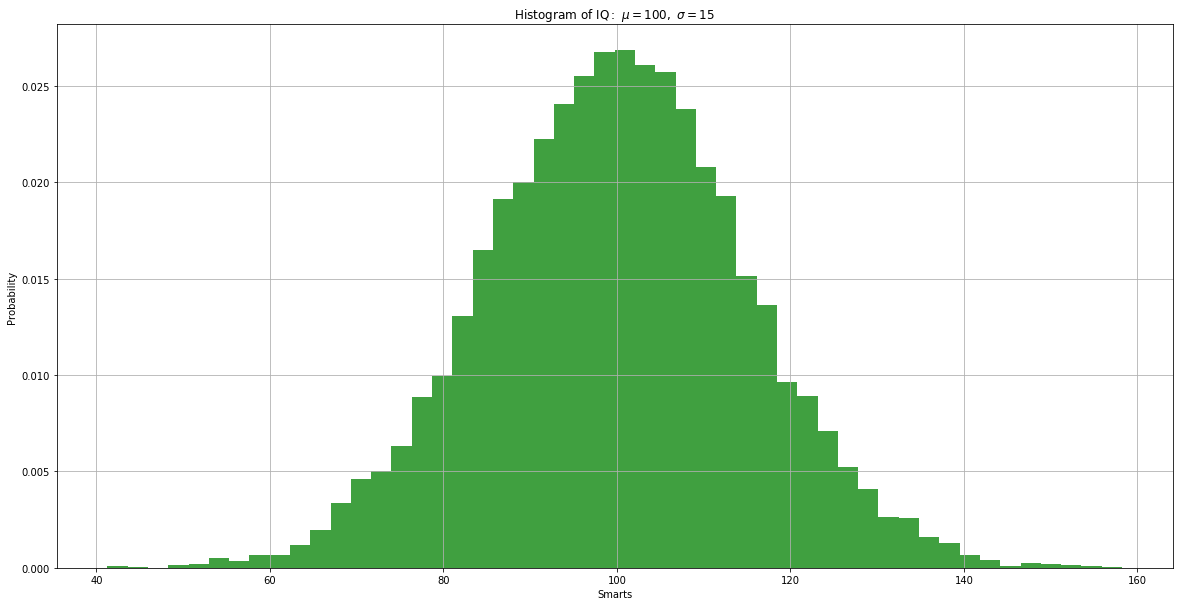

In [29]:
# the histogram of the data
plt.hist(x, 50, normed=1, facecolor='green', alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$') # allows for latex formatting
# plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

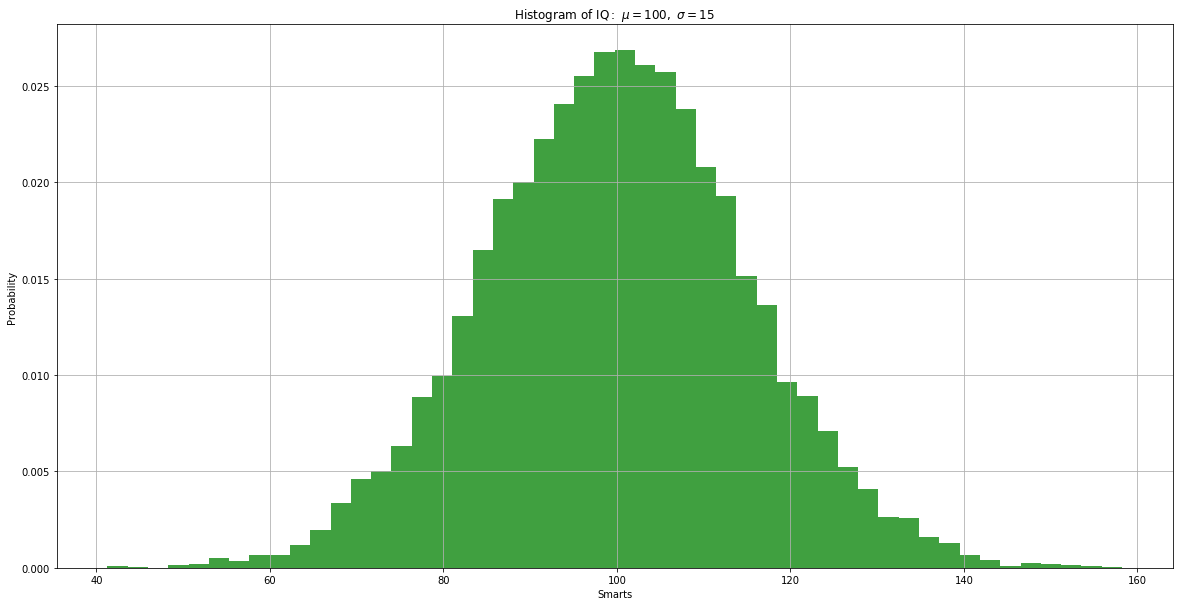

In [30]:
# the histogram of the data
plt.hist(x, 50, density=True, facecolor='green', alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$') # allows for latex formatting
# plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

Here's how we made our histogram before:

In [31]:
penalty_data["FACE_VALUE"][penalty_data["FACE_VALUE"] < 1000].hist()

NameError: name 'penalty_data' is not defined

And this is how we'd change it so that we can add more features:

In [32]:
capped_face_value_data = penalty_data["FACE_VALUE"][penalty_data["FACE_VALUE"] < 1000]

plt.hist(capped_face_value_data)
plt.show()

NameError: name 'penalty_data' is not defined

Let's look at some of the things we can do to this. The docs for histograms are here: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist

In [33]:
capped_face_value_data = penalty_data["FACE_VALUE"][penalty_data["FACE_VALUE"] < 1000]

plt.hist(capped_face_value_data, bins=10, facecolor='blue', alpha=0.2) #<-old one
plt.hist(capped_face_value_data, bins=50, facecolor='green', alpha=1)  #<-new one
plt.show()

NameError: name 'penalty_data' is not defined

We can go back to our initial, unfiltered, data:

In [34]:
plt.hist(penalty_data["FACE_VALUE"], bins=50)
plt.show()

NameError: name 'penalty_data' is not defined

Instead of doing the filtering before we present the data, we can use the graph to hide the extents of an axis:

In [35]:
plt.hist(penalty_data["FACE_VALUE"], bins=50, range=(0, 2000))
plt.show()

NameError: name 'penalty_data' is not defined

We can nice that up a bit by pulling the parameters out as variables:
(unmagically, no difference!)

In [36]:
number_of_bins = 50
lower_bound = 0
upper_bound = 1000
plt.hist(penalty_data["FACE_VALUE"], bins=number_of_bins, range=(lower_bound, upper_bound))
plt.show()

NameError: name 'penalty_data' is not defined

This is still pretty naughty, we should have at least a title and some axis lables.

We do that by setting some more properties on the `plt` object:

In [37]:
number_of_bins = 100
lower_bound = 0
upper_bound = 1000

plt.hist(penalty_data["FACE_VALUE"], bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Number of fines of a given value issued between {} and {}".format("then", "now"), fontsize=18)
plt.xlabel('$ value of fine', fontsize=26)
plt.ylabel('Count', fontsize=26)
plt.grid(True)
plt.show()

NameError: name 'penalty_data' is not defined

We could get the dates from the dataset if we wanted to be clever about it.

If we reimport the date, but with a bit more cleverness, we can tell pandas to convert the dates to actual dates.

Because _we_ are civilised, we use either iso dates `YYYY-MM-DD` or `DD-MM-YYYY`, but often you'll have to deal with data prepared by savages who don't respect this rational behaviour. They will use `MM-DD-YY` and other such primitive formats.

The settings used here control how it's read. You can only really tell by looking at the data and working it out. E.g. are there months bigger than 12?

In [38]:
penalty_data = pd.read_csv(filepath,
                           infer_datetime_format=True,
                           parse_dates=['OFFENCE_MONTH'],
                           dayfirst=True)
penalty_data.head(2)

ValueError: 'OFFENCE_MONTH' is not in list

This is some straight up, powerful voodoo.

We're grouping the fines by month, and then adding up the groups. Pandas' `groupby` feature allows for all kinds of clever stuff like that.

In [39]:
income = penalty_data[["OFFENCE_MONTH","FACE_VALUE"]].groupby("OFFENCE_MONTH").sum()

plt.xkcd()
plt.plot(income, "x-")
plt.title("Monthly income from fines", fontsize=18)
plt.xlabel('Date', fontsize=26)
plt.ylabel('$ Value', fontsize=26)
plt.grid(True)
plt.show()

NameError: name 'penalty_data' is not defined

In [40]:
matplotlib.rcParams.update(saved_style_state) # revert to regular matplotlib styles, not xkcd

I don't expect you to learn this this week, I just want to give you a taste of what can be done, quite simply, with pandas and matplotlib.

# some tricky tricks

Say you have a _lot_ of rows, running things on them takes a long time. You can test on a subset of that and then come bakc to the full dataframe once you are more sure that it works.

To do this we can use python slices in combination with the dataframe's `.loc` property.

In [41]:
ss = penalty_data.loc[:5]

NameError: name 'penalty_data' is not defined

Let's say you want to apply a function to each row in a dataframe, and save the result as a new column in the dataframe. This is where `apply` come in handy.

In [42]:
ss["day"] = ss.apply(lambda x: x.OFFENCE_MONTH.day, axis=1)
ss.head(1)

NameError: name 'ss' is not defined

Above is equivalent to below, it's up to you to decide what is more readable.

In [43]:
def my_f(x):
    return x.day

ss["day"] = ss.apply(my_f, axis=1)
ss.head(1)

NameError: name 'ss' is not defined

How do we tell the computer to treat _facade_ and _fašade_ the same? What about _University of new south wales_, _University of New South Wales_, _University of NSW_, _UNSW_, _New-south_?

## The answer is _folding_

_(This is a "pattern")_

In [44]:
def fold(given):
    """Return canonical versions of inputs."""
    
    # Use canonical variables so that you can define once, use many times.
    UNSW_canonical = "uni of stairs"
    ben_name_cannonical = "Ben Doherty"

    # dictionary of input:output pairs
    folds = {
        "University of new south wales": UNSW_canonical,
        "University of New South Wales": UNSW_canonical,
        "University of NSW": UNSW_canonical,
        "UNSW": UNSW_canonical,
        "New-south": UNSW_canonical,
        "BDoh": ben_name_cannonical,
        "Benny": ben_name_cannonical,
        "Mr Dockerty": ben_name_cannonical,
        "Oi, Dickehead!": ben_name_cannonical
    }

#     return folds[given] # needs a defensive part, but ommited for clarity.
    default_value = given
    return folds.get(given, default_value)

print(fold("New-south"))
print(fold("BDoh"))

uni of stairs
Ben Doherty


# _fin_